# The goal of this project is to create Systematic - Automatic approach of dealing with ML prototyping

## First we always start with Reading Data, Visualizing Data, Cleaning Data

In [1]:
import pandas as pd
import datetime
import numpy as np

from time import gmtime
from time import strftime

import matplotlib.pyplot as plt

dataFrame = pd.read_csv('Q3-data.csv') 
print(dataFrame.head())

   House  Time      TV      Agg
0    1.0   0.0  11.463   26.205
1    1.0   1.0  11.702   25.771
2    1.0   2.0  11.016   24.963
3    1.0   3.0  11.054   96.582
4    1.0   4.0  11.123  100.034


# Before anything starts we need to formulate how to set up our data
If this is a supervised learning problem we will need a clear input output data, so we will have to clean this and creat a clear input output connection

In this particular problem we can do that using the TV column, we translate this information of TV current cunsamtion into a binarry groundtruth classification between open and closed TV

In [2]:
allBackets = []
todayBackets = []
housePr = -1
for i in range(len(dataFrame.TV)):
    
    houseNow = int(dataFrame.House[i])-1
    if (housePr!=houseNow):
        if (housePr!=-1):
            allBackets.append(todayBackets)
        todayBackets = []
        todayBackets.append([dataFrame.TV[i],dataFrame.Agg[i],0])
        housePr = houseNow
    else:
        todayBackets.append([dataFrame.TV[i],dataFrame.Agg[i],0])
        
        
allBackets.append(todayBackets)

# print(allBackets[0]) # information of House 0
print(allBackets[0][20]) # information of House 0 hour 20
print(allBackets[0][20][0]) # information of House 0 hour 20 TV current 0 -> 0 = TV Current / 1 = All House Current / 2 = Ground Truth Open Close



MaxMinHouse = np.zeros((2,len(allBackets)))-1 # 0 -> max # 1 -> min
MaxMinHouse[1,:] = float("Inf")
for houseN in range(len(allBackets)):
    for i in range(len(allBackets[houseN])):
        if MaxMinHouse[0,houseN]<allBackets[houseN][i][0]:
            MaxMinHouse[0,houseN] = allBackets[houseN][i][0]
        if MaxMinHouse[1,houseN]>allBackets[houseN][i][0]:
            MaxMinHouse[1,houseN] = allBackets[houseN][i][0]
            
            
print("max,min = ",MaxMinHouse[0,0],MaxMinHouse[1,0])
print("max,min = ",MaxMinHouse[0,1],MaxMinHouse[1,1])
print("max,min = ",MaxMinHouse[0,2],MaxMinHouse[1,2])
       

[11.115, 177.798, 0]
11.115
('max,min = ', 23.303, 10.533)
('max,min = ', 136.806, 0.5660000000000001)
('max,min = ', 118.39200000000001, 0.125)


# Visualization of the Data and Changing info to GroundTruth 

('House = ', 0)
Histogram


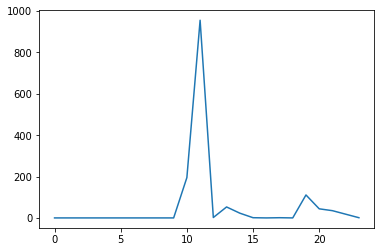

('threshold = ', 19)
Raw Signal


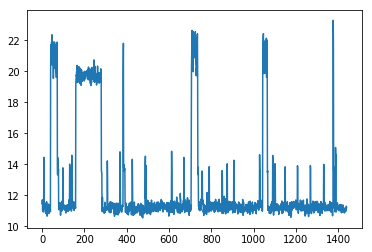

Signal Translated to binary


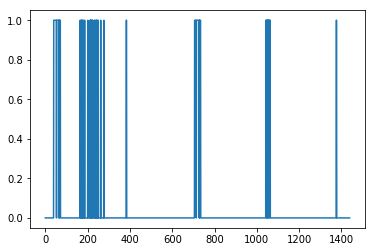

('House = ', 1)
Histogram


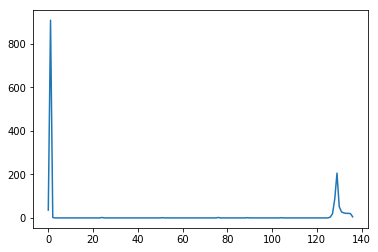

('threshold = ', 51)
Raw Signal


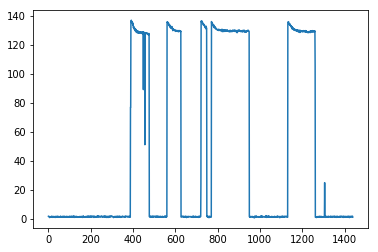

Signal Translated to binary


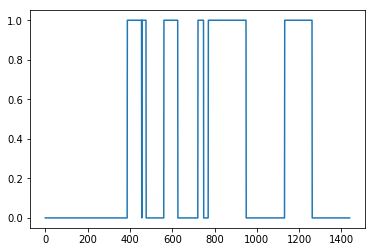

('House = ', 2)
Histogram


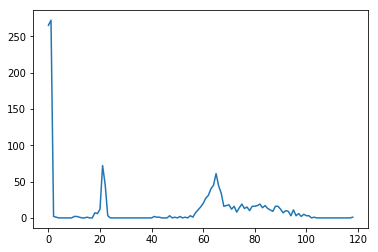

('threshold = ', 41)
Raw Signal


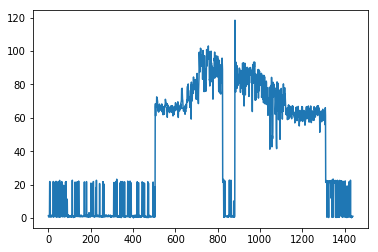

Signal Translated to binary


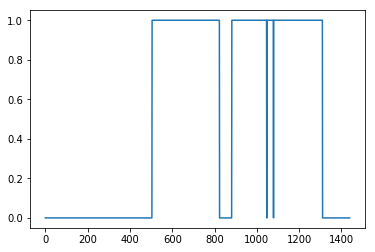

In [3]:
from functionsModelTrain.cleaningData import balanced_hist_thresholding


for houseN in range(len(allBackets)): 
    showNow = np.zeros((int(MaxMinHouse[0,houseN])+1,1))
    printSignal = []
    for i in range(len(allBackets[houseN])):
        showNow[int(allBackets[houseN][i][0])] = showNow[int(allBackets[houseN][i][0])] + 1
        printSignal.append(allBackets[houseN][i][0])

    print("House = ",houseN)
    
    print("Histogram")
    plt.plot(showNow)
    plt.show()

    thresh_value = balanced_hist_thresholding(showNow)
    print("threshold = ",thresh_value)
    
    
    print("Raw Signal")
    plt.plot(printSignal)
    plt.show()
    
    showThreshold = []
    for i in range(len(allBackets[houseN])):
        if (int(allBackets[houseN][i][0])>thresh_value):
            allBackets[houseN][i][2] = 1 
        else:
            allBackets[houseN][i][2] = 0 
            
        showThreshold.append(allBackets[houseN][i][2])
      
    print("Signal Translated to binary")
    plt.plot(showThreshold)
    plt.show()
    

# Different visualization using Backets

(2981.841000000001, 1.87)


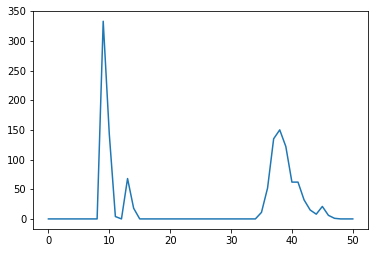

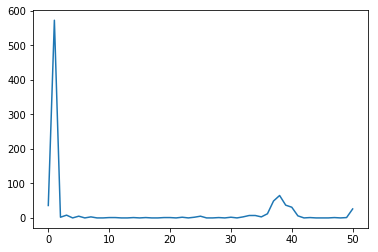

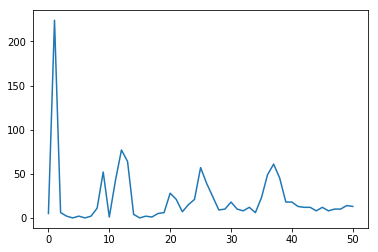

In [4]:

maxTV = max(dataFrame.Agg)
minTV = min(dataFrame.Agg)
print(maxTV,minTV)

maxTV = 130

backetsAvailable = 50 # This is the numbers of areas that we will have 
areaPerBacket = (maxTV-minTV)/backetsAvailable

todayBackets = np.zeros((backetsAvailable+1,3))
for i in range(len(dataFrame.TV)):
    if (dataFrame.Agg[i]<130):
        backetNow = int(dataFrame.Agg[i]/areaPerBacket)
        todayBackets[backetNow,int(dataFrame.House[i])-1] = todayBackets[backetNow,int(dataFrame.House[i])-1] + 1
    

plt.plot(todayBackets[:,0])
plt.show()   
plt.plot(todayBackets[:,1])
plt.show()   
plt.plot(todayBackets[:,2])
plt.show()   

1s in blue, 0s in orange

House  0


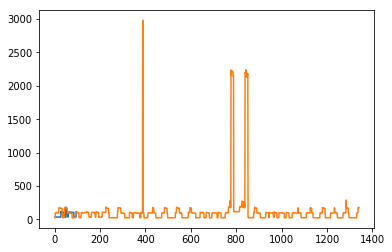

ones:  98
min 33.635999999999996 max 184.322 mean 74.05245918367348

zeros:  1342
min 23.241 max 2981.841000000001 mean 122.98144634873326
------------------------------------------

House  1


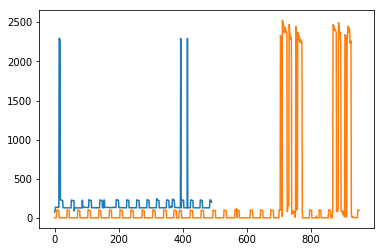

ones:  490
min 78.623 max 2293.5080000000007 mean 181.48038775510207

zeros:  950
min 1.87 max 2524.0260000000007 mean 226.02191789473684
------------------------------------------

House  2


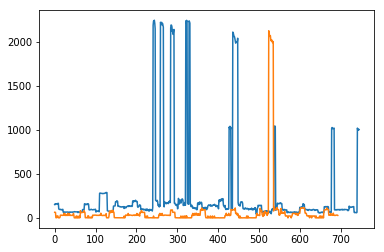

ones:  746
min 46.713 max 2242.771 mean 261.9997305630027

zeros:  694
min 2.3890000000000002 max 2123.544 mean 68.02825072046109
------------------------------------------


In [5]:
def visualise_data (allBackets):
    print "1s in blue, 0s in orange"
    for i in range(3):
        print
        print "House ",i
        ones = [v for v in allBackets[i] if v[2] == 1]
        ones = np.array(ones)
        zeros = [v for v in allBackets[i] if v[2] == 0]
        zeros = np.array(zeros)

        plt.plot(ones[:,1])
        plt.plot(zeros[:,1])
        plt.show()
        print "ones: ", len(ones)
        print "min",np.min(ones[:,1]), "max", np.max(ones[:,1]), "mean", np.mean(ones[:,1])
        print
        print "zeros: ",len(zeros)
        print "min",np.min(zeros[:,1]), "max", np.max(zeros[:,1]), "mean", np.mean(zeros[:,1])
        print "------------------------------------------"
        
visualise_data(allBackets)


# Find the outliers 

In [6]:
from functionsModelTrain.cleaningData import find_outliers

house0 = allBackets[0]
house1 = allBackets[1]
house2 = allBackets[2]

data = []
data.extend(house0) 
data.extend(house1) 
data.extend(house2)

data = np.array(data)
data = data[:,1] 
print len(house0), len(house1), len(house2)
print len(data)

lower_bound, upper_bound = find_outliers (data)


1440 1440 1440
4320
bounds:   -131.71587499999998 <-> 286.36512500000003


# UNDERSAMPLING (REMOVE OUTLIERS FROM DATA) & VISUALISATION

In [7]:
def undersampling (allBackets):

    underSampl1 = [v for v in allBackets[0] if v[1] < upper_bound]
    underSampl2 = [v for v in allBackets[1] if v[1] < upper_bound]
    underSampl3 = [v for v in allBackets[2] if v[1] < upper_bound]

    return underSampl1,underSampl2,underSampl3


underSampl1,underSampl2,underSampl3 = undersampling(allBackets)

allBackets2=[]
allBackets2.append(underSampl1)
print (len(allBackets2[0]))
allBackets2.append(underSampl2)
print (len(allBackets2[1]))
allBackets2.append(underSampl3)
print (len(allBackets2[2]))

print (allBackets2[0][0])


1413
1354
1360
[11.463, 26.205, 0]


1s in blue, 0s in orange

House  0


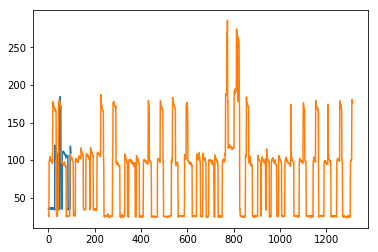

ones:  98
min 33.635999999999996 max 184.322 mean 74.05245918367348

zeros:  1315
min 23.241 max 285.85 mean 81.52233155893536
------------------------------------------

House  1


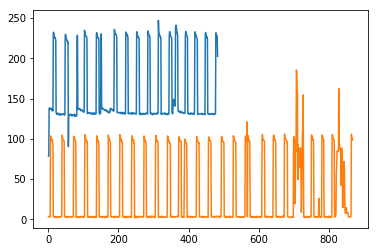

ones:  484
min 78.623 max 247.1 mean 155.40420454545455

zeros:  870
min 1.87 max 185.418 mean 29.608228735632185
------------------------------------------

House  2


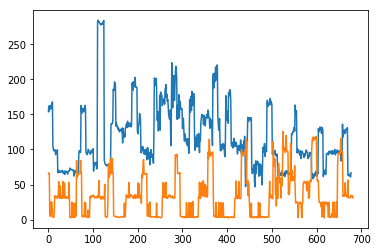

ones:  678
min 46.713 max 284.34 mean 118.96719616519172

zeros:  682
min 2.3890000000000002 max 125.61399999999999 mean 33.35397360703813
------------------------------------------


In [8]:
visualise_data(allBackets2)

# Separate into Train and Test Data with multiple different combinations

In [9]:
from functionsModelTrain.trainTest import train_test_sets


#ALL HOUSES ORIGINAL
train_data_org , train_labels_org, test_data_org , test_labels_org = train_test_sets(allBackets, 0.7, House0=1, Outliers_train=1, Outliers_test=1)
#ALL HOUSES :TRAIN_DATA -> NO OUTLIERS
train_data , train_labels,test_data , test_labels = train_test_sets(allBackets, 0.7, House0=1, Outliers_train=0, Outliers_test=1)
#ALL HOUSES : TRAIN_DATA & TEST DATA -> NO OUTLIERS"
train_data_noOUT , train_labels_noOUT , test_data_noOUT  , test_labels_noOUT = train_test_sets(allBackets, 0.7, House0=1, Outliers_train=0, Outliers_test=0)


#ORIGINAL NO HOUSE 0
train_data_noHouse0_org , train_labels_noHouse0_org, test_data_noHouse0_org  , test_labels_noHouse0_org = train_test_sets(allBackets, 0.7, House0=0, Outliers_train=1, Outliers_test=1)
#NO HOUSE 0 : TRAIN_DATA -> NO OUTLIERS
train_data_noHouse0 , train_labels_noHouse0 ,test_data_noHouse0  , test_labels_noHouse0= train_test_sets(allBackets, 0.7, House0=0, Outliers_train=0, Outliers_test=1)
#"NO HOUSE 0 : TRAIN_DATA & TEST DATA -> NO OUTLIERS"
train_data_noHouse0_noOUT , train_labels_noHouse0_noOUT , test_data_noHouse0_noOUT  , test_labels_noHouse0_noOUT = train_test_sets(allBackets, 0.7, House0=0, Outliers_train=0, Outliers_test=0)




# Test different models in your trainin data

In [10]:
from functionsModelTrain.models import logisticRegression_classifier

print "ALL HOUSES ORIGINAL"
modelLogReg = logisticRegression_classifier(train_data_org, train_labels_org)


ALL HOUSES ORIGINAL


/mnt/storage/home/qb18517/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# TEST model and accuracy metrics

In [11]:
from functionsModelTrain.testModelAccur import accuracyScoreModel,confussionMatr,classification_reportRes

print(accuracyScoreModel(modelLogReg,test_data,test_labels))
print(confussionMatr(modelLogReg,test_data,test_labels))
print(classification_reportRes(modelLogReg,test_data,test_labels))

0.6735950731331793
[[863  35]
 [389  12]]
              precision    recall  f1-score   support

         OFF       0.69      0.96      0.80       898
          ON       0.26      0.03      0.05       401

   micro avg       0.67      0.67      0.67      1299
   macro avg       0.47      0.50      0.43      1299
weighted avg       0.56      0.67      0.57      1299



In [12]:
from functionsModelTrain.models import RandomForest_Classifier


modelRFC = RandomForest_Classifier(train_data_org, train_labels_org,100)


In [13]:
from functionsModelTrain.testModelAccur import accuracyScoreModel,confussionMatr,classification_reportRes

print(accuracyScoreModel(modelRFC,test_data,test_labels))
print(confussionMatr(modelRFC,test_data,test_labels))
print(classification_reportRes(modelRFC,test_data,test_labels))

0.9515011547344111
[[868  30]
 [ 33 368]]
              precision    recall  f1-score   support

         OFF       0.96      0.97      0.96       898
          ON       0.92      0.92      0.92       401

   micro avg       0.95      0.95      0.95      1299
   macro avg       0.94      0.94      0.94      1299
weighted avg       0.95      0.95      0.95      1299



In [14]:
from functionsModelTrain.models import SVM_classifier


modelSVM = SVM_classifier(train_data_org, train_labels_org,'rbf',30,'auto')
# modelSVM = SVM_classifier(train_data_org, train_labels_org)


In [15]:
from functionsModelTrain.testModelAccur import accuracyScoreModel,confussionMatr,classification_reportRes

print(accuracyScoreModel(modelSVM,test_data,test_labels))
print(confussionMatr(modelSVM,test_data,test_labels))
print(classification_reportRes(modelSVM,test_data,test_labels))

0.9006928406466512
[[872  26]
 [103 298]]
              precision    recall  f1-score   support

         OFF       0.89      0.97      0.93       898
          ON       0.92      0.74      0.82       401

   micro avg       0.90      0.90      0.90      1299
   macro avg       0.91      0.86      0.88      1299
weighted avg       0.90      0.90      0.90      1299



In [16]:
from functionsModelTrain.models import NeuralNetwork_Classifier


# modelNN = NeuralNetwork_Classifier(train_data_org, train_labels_org,[5,12,18,12,5],500)
modelNN = NeuralNetwork_Classifier(train_data_org, train_labels_org,[11,18,11],1500)


In [17]:
from functionsModelTrain.testModelAccur import accuracyScoreModel,confussionMatr,classification_reportRes

print(accuracyScoreModel(modelNN,test_data,test_labels))
print(confussionMatr(modelNN,test_data,test_labels))
print(classification_reportRes(modelNN,test_data,test_labels))

0.5989222478829869
[[620 278]
 [243 158]]
              precision    recall  f1-score   support

         OFF       0.72      0.69      0.70       898
          ON       0.36      0.39      0.38       401

   micro avg       0.60      0.60      0.60      1299
   macro avg       0.54      0.54      0.54      1299
weighted avg       0.61      0.60      0.60      1299



# GridSearch for HyperParameter Tunning

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

jsonInfo = {
    'hidden_layer_sizes':[[10,10],[5,10,5]],
    'max_iter':[500,1000,2000]
}

mlpc = GridSearchCV(MLPClassifier(),jsonInfo,return_train_score=False)

train_data_orgNow = train_data_org.reshape(-1,1)

mlpc.fit(train_data_orgNow, train_labels_org)



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_iter': [500, 1000, 2000], 'hidden_layer_sizes': [[10, 10], [5, 10, 5]]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [39]:
df = pd.DataFrame(mlpc.cv_results_)
print(df[['param_hidden_layer_sizes','param_max_iter','mean_test_score']])

print(mlpc.best_score_)
print(mlpc.best_params_)

  param_hidden_layer_sizes param_max_iter  mean_test_score
0                 [10, 10]            500         0.732539
1                 [10, 10]           1000         0.684542
2                 [10, 10]           2000         0.731877
3               [5, 10, 5]            500         0.727905
4               [5, 10, 5]           1000         0.733863
5               [5, 10, 5]           2000         0.735849
0.7358490566037735
{'max_iter': 2000, 'hidden_layer_sizes': [5, 10, 5]}


In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier


mlpc = RandomizedSearchCV(MLPClassifier(),{
    'hidden_layer_sizes':[[10,10],[5,10,5],[5,10,20,10,5],[5,5,5]],
    'max_iter':[500,1000,2000,5000]
},return_train_score=False,n_iter=10)

train_data_orgNow = train_data_org.reshape(-1,1)

mlpc.fit(train_data_orgNow, train_labels_org)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_iter': [500, 1000, 2000, 5000], 'hidden_layer_sizes': [[10, 10], [5, 10, 5], [5, 10, 20, 10, 5], [5, 5, 5]]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=False, scoring=None, verbose=0)

In [35]:
df = pd.DataFrame(mlpc.cv_results_)
print(df[['param_hidden_layer_sizes','param_max_iter','mean_test_score']])

print(mlpc.best_score_)
print(mlpc.best_params_)

  param_hidden_layer_sizes param_max_iter  mean_test_score
0                 [10, 10]           5000         0.685866
1               [5, 10, 5]           5000         0.775240
2                [5, 5, 5]           1000         0.683217
3                [5, 5, 5]           2000         0.730222
4       [5, 10, 20, 10, 5]           1000         0.732208
5               [5, 10, 5]            500         0.775902
6       [5, 10, 20, 10, 5]            500         0.731215
7               [5, 10, 5]           2000         0.786164
8               [5, 10, 5]           1000         0.734194
9       [5, 10, 20, 10, 5]           2000         0.786495
0.7864945382323734
{'max_iter': 2000, 'hidden_layer_sizes': [5, 10, 20, 10, 5]}
